---

Universidade Federal do Rio Grande do Norte

Centro de Tecnologia

Departamento de Engenharia de Computação e Automação

ELE0606 - Tópicos especiais em inteligência artificial

Student: Levy Gabriel da Silva Galvão

Título: Comparison of machine learning models after dimensionality reduction

---

# Libraries import

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

sns.set_theme();

# Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, \
                                    train_test_split
from sklearn.pipeline import Pipeline 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, \
                            confusion_matrix, \
                            classification_report

# Objective

The objective of this work is to parse the influence of dimensionality reduction (DR) on machine learning classification models results. Thus comparing the results for different models beeing trained with multiples datasets before and after DR.

The method of DR that will be used is the Pirncipal Component Analysis (PCA) and will mainly used to transform the datasets into a 2D version for visualization and ease of train fashion.

In further sections all three datasets used are briefed with some of its essential characteristics.

Soon after the machine learning models are listed and initialized into functions with ease to use so the results can be easily visualized.

Finally the results will be discussed and conclusions will be addressed.

# Dataset

There will be used three different classification datasets.

## Iris

The first one is the Iris dataset (https://archive.ics.uci.edu/ml/datasets/iris), containing 3 classes of 50 instances each and its label refering to a type of iris plant. It contains four attributes:

1. sepal length in cm;
2. sepal width in cm;
3. petal length in cm;
4. petal width in cm;

And the possible class labels are:

- Iris Setosa: 50;
- Iris Versicolour: 50;
- Iris Virginica: 50;

For the iris dataset:

In [2]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df_iris = pd.read_csv(filename, header=None)
df_iris.columns = ['sepal_lentgh', 'sepal_width', 'petal_length', 'petal_width', 'target']
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lentgh  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Below is shown the target distribution of the Iris dataset:

Text(0.5, 0.98, 'Target distribution of Iris dataset')

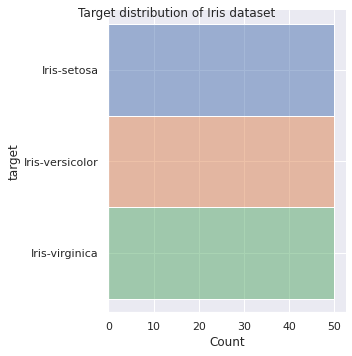

In [3]:
sns.displot(df_iris, y='target', hue='target', legend=False).fig.suptitle('Target distribution of Iris dataset')

## Wine

- Iris (https://archive.ics.uci.edu/ml/datasets/iris);
- Wine (https://archive.ics.uci.edu/ml/datasets/wine);
- Synthetic Control Chart Time Series Data Set (https://archive.ics.uci.edu/ml/datasets/synthetic+control+chart+time+series);

The second one is the Wine dataset (https://archive.ics.uci.edu/ml/datasets/wine) that contains the information about 13 feature attributes that links to three different classes of wine. The attributes are listed below:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline   

Each class has the following number of instances (that will be later confirmed by plot):

- class 1: 59
- class 2: 71
- class 3: 48

For the wine dataset:

In [4]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df_wine = pd.read_csv(filename, header=None)
df_wine.columns = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 
              'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 
              'color_intensity', 'hue', 'OD280/OD315_of_diluted_wines', 'proline']
df_wine['target'] = df_wine['target'].astype(str)
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   target                        178 non-null    object 
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  proli

And below is the target distribution histogram plot to confirm the number of instances of each class:

Text(0.5, 0.98, 'Target distribution of Wine dataset')

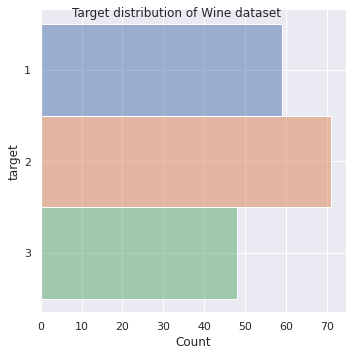

In [5]:
sns.displot(df_wine, y='target', hue='target', legend=False).fig.suptitle('Target distribution of Wine dataset')

## Synthetic Control Chart Time Series

The third and last dataset is the Synthetic Control Chart Time Series (https://archive.ics.uci.edu/ml/datasets/synthetic+control+chart+time+series). This dataset contains 600 examples of control charts synthetically generated by the process in Alcock and Manolopoulos (1999) and each chart with 60 samples (that becomes each attribute column). There are six different classes of control charts:

1. Normal: 100;
2. Cyclic: 100;
3. Increasing trend: 100;
4. Decreasing trend: 100;
5. Upward shift: 100;
6. Downward shift: 100;

Each class is divided by order of appearence in the number of occurrences is 100 samples for each class. The targets are not explicity defined, so they need to be set after loading the dataset. But a simple line plot of each sample can show the clear difference and degree of belonging to each class.


For the synthetic control chart time series:

In [6]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/synthetic_control-mld/synthetic_control.data'
df_ctrl = pd.read_csv(filename, header=None, delim_whitespace=True)
repeat_num = 100
df_ctrl['target'] = pd.Series(np.concatenate((
                              np.repeat('normal',repeat_num),
                              np.repeat('cyclic',repeat_num),
                              np.repeat('increasing_trend',repeat_num),
                              np.repeat('decreasing_trend',repeat_num),
                              np.repeat('upward_shift',repeat_num),
                              np.repeat('downward_shift',repeat_num),
                              ), axis=0))
df_ctrl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    float64
 3   3       600 non-null    float64
 4   4       600 non-null    float64
 5   5       600 non-null    float64
 6   6       600 non-null    float64
 7   7       600 non-null    float64
 8   8       600 non-null    float64
 9   9       600 non-null    float64
 10  10      600 non-null    float64
 11  11      600 non-null    float64
 12  12      600 non-null    float64
 13  13      600 non-null    float64
 14  14      600 non-null    float64
 15  15      600 non-null    float64
 16  16      600 non-null    float64
 17  17      600 non-null    float64
 18  18      600 non-null    float64
 19  19      600 non-null    float64
 20  20      600 non-null    float64
 21  21      600 non-null    float64
 22  22

Its target distribution is as below:

Text(0.5, 0.98, 'Target distribution of Control dataset')

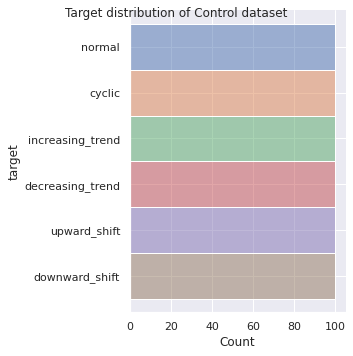

In [7]:
sns.displot(df_ctrl, y='target', hue='target', legend=False).fig.suptitle('Target distribution of Control dataset')

To visualize the time series to each target the cell below will extract 2 random charts from each label and plot them together so the topological difference can be noticed.

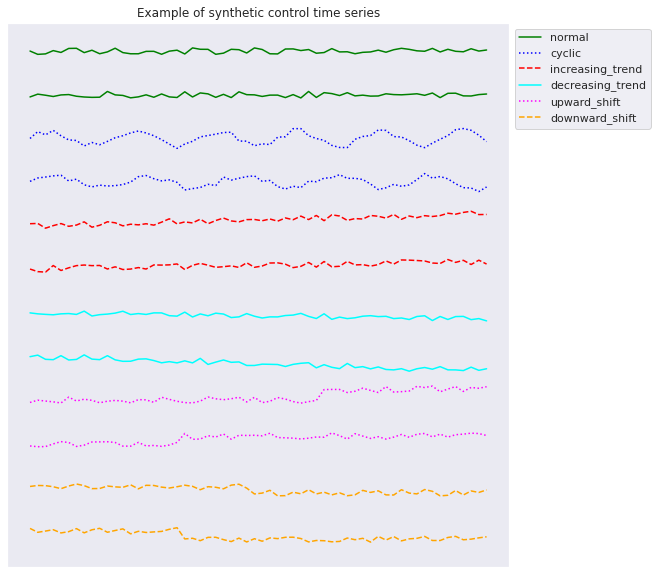

In [8]:
# Plot styles
targets = df_ctrl['target'].unique()
colors = np.repeat(np.array(['green','blue','red','cyan','magenta','orange']),2)
lstyles = np.repeat(np.array(['solid','dotted','dashed','solid','dotted','dashed']),2)
labels = lambda x: np.repeat(targets,2)[x] if(x%2) else None

# Extract few time series to plot
df_plot = pd.DataFrame()
for target in targets: df_plot = pd.concat([df_plot, df_ctrl[df_ctrl['target']==target].sample(n=2)], axis=0)
plot_array = np.array(df_plot.drop(columns='target').transpose())

# Plot time series stacked
fig, ax = plt.subplots(figsize=(9,10))
n = 2*len(targets)
for i in range(n): 
  ax.plot(np.arange(60), 
          plot_array[:,i] + (80*(n-i)), 
          label=labels(i), 
          color=colors[i], 
          linestyle=lstyles[i]) 
ax.set_title('Example of synthetic control time series')
ax.set_yticks([])
ax.set_xticks([])
ax.legend(bbox_to_anchor=(1, 1));

And according to the plot and its labels, it is confirmed that the labeling is correct, since each said behavior (e.g. normal, cyclic, etc.) matches the correspondent time series topology.

# Machine learning models

The following machine learning models will be used to validate the results on the previous datasets:

- KNN;
- Naive Bayes;
- Decision tree;
- Random forest;

The training functions for the models will use grid search to find some hyperparameter that maximize the overall score, avoiding it to be tuned one by one and for each dataset. The PCA model tuned to transform the dataset to 2D will be embedded in each model function and will be activated via a flag.

Another detail is that the min-max scaler wass appended into the model pipeline for feature scaling.

The steps to build and test the model are:

1. Build the model pipeline according to the necessity, feature scaling, do having or not PCA, choosing the classifier model and its hyperparameter grid for the grid search;
2. Apply simple train/test split for holdout;
3. Apply grid search and find best model for the given problem;
4. Display metrics (when using PCA some specifics metrics are displayed);

The PCA metrics that are displayed are mainly based in the explained variance ratio of each component, i.e. the percentage of the variance of the original dataset capture by each component. Since all tests are running with 2 components, so the results will show only the explained variance ratio for each component and the cumulative value, that explains how the new dimensions of the dataset together preservers the original dataset variance.

In [9]:
def run(data, train_per=0.8, clf='knn', dim=2):
  # Build search space for the model 
  steps_nopca = []
  steps_pca = []

  steps_nopca.append(('scaler', MinMaxScaler()))
  
  steps_pca.append(('scaler', MinMaxScaler()))
  steps_pca.append(('pca', PCA(n_components=dim)))
  
  if(clf=='knn'):
    steps_nopca.append(('clf', KNeighborsClassifier(algorithm='auto', n_jobs=-1, leaf_size=100)))
    steps_pca.append(('clf', KNeighborsClassifier(algorithm='auto', n_jobs=-1, leaf_size=100)))
    param_grid = {
      'clf__n_neighbors': [1, 3, 5, 7],
      'clf__weights': ['uniform', 'distance'], 
      'clf__metric': ['euclidean', 'minkowski']
    }
  elif(clf=='naive_bayes'):
    steps_nopca.append(('clf', GaussianNB()))
    steps_pca.append(('clf', GaussianNB()))
    param_grid = {
      'clf__var_smoothing': [1e-10, 1e-9, 1e-8]
    }
  elif(clf=='decision_tree'):
    steps_nopca.append(('clf', DecisionTreeClassifier()))
    steps_pca.append(('clf', DecisionTreeClassifier()))
    param_grid = {
      'clf__criterion': ['gini', 'entropy'],
      'clf__max_depth': [None, 5, 10, 15],
    }
  elif(clf=='random_forest'): 
    steps_nopca.append(('clf', RandomForestClassifier()))  
    steps_pca.append(('clf', RandomForestClassifier()))  
    param_grid = {
      'clf__n_estimators': [10, 50, 100, 200, 300],
      'clf__criterion': ['gini', 'entropy'],
      'clf__max_depth': [None, 5, 10, 15]
    }

  # Holdout 
  train, test = train_test_split(data, train_size=train_per, random_state=42, shuffle=True)
  X_train = np.array(train.drop(columns=['target']))
  X_test = np.array(test.drop(columns=['target']))
  y_train = np.array(train['target'])
  y_test = np.array(test['target'])

  # Grid search (not using pca)
  start = time.process_time()
  pipe_nopca = Pipeline(steps_nopca)
  model_nopca = GridSearchCV(pipe_nopca, param_grid, n_jobs=-1, verbose=False)
  model_nopca = model_nopca.fit(X_train, y_train)
  y_pred_nopca = model_nopca.predict(X_test)
  print('Not using pca grid search duration: ' + str(time.process_time()-start) + ' seconds')

  # Grid search (using pca)
  start = time.process_time()
  pipe_pca = Pipeline(steps_pca)
  model_pca = GridSearchCV(pipe_pca, param_grid, n_jobs=-1, verbose=False)
  model_pca = model_pca.fit(X_train, y_train)
  y_pred_pca = model_pca.predict(X_test)
  print('Using pca grid search duration: ' + str(time.process_time()-start) + ' seconds')
  print()

  # Metrics
  fig, ax = plt.subplots(1,2, figsize=(13,5))
  met_size = 30
  print('Model metrics (not using pca):')
  print('='*30)
  print('Best hyperparameters: ' + str(model_nopca.best_params_))
  print('Best score: ' + str(model_nopca.score(X_test, y_test)))
  print()
  print('Model metrics (using pca):')
  print('='*30)
  print('Best hyperparameters: ' + str(model_pca.best_params_))
  print('Best score: ' + str(model_pca.score(X_test, y_test)))
  print()

  components = model_pca.best_estimator_.named_steps["pca"].n_components_
  explained_variance = model_pca.best_estimator_.named_steps["pca"].explained_variance_ratio_
  cum_explained_variance = np.cumsum(explained_variance)
  df = pd.DataFrame([np.arange(components, dtype=np.int)+1, explained_variance, cum_explained_variance], 
                    index=['Component', 'Explained variance', 'Cumulative']).T
  print('PCA metrics:')
  print('='*met_size)
  print('Components: ' + str(components))
  print(df.to_string(index=False))
  print()

  print('Confusion matrix:')
  cm = confusion_matrix(y_test, y_pred_nopca, labels=model_nopca.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_nopca.classes_)
  disp.plot(ax=ax[0], colorbar=False)
  cm = confusion_matrix(y_test, y_pred_pca, labels=model_pca.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_pca.classes_)
  disp.plot(ax=ax[1], colorbar=False)
  ax[0].title.set_text('Not using PCA')
  ax[1].title.set_text('Using PCA')
  plt.show()

# Dimensionality reduction plots

Before the simulation and analysis of the score results, a primary test is to plot the new 2D dataset as result of PCA trying to indetify visually some patterns in the classes distribution.

In [48]:
def pca_plot(df, title):
  X = np.array(df.drop(columns=['target'])) # original feature matrix
  y = np.array(df['target'])
  target_names = np.unique(y)
  pca = PCA(n_components=2)
  X2D = pca.fit(X).transform(X) # feature matrix after pca

  print('Explained variance ratio: %s' % str(pca.explained_variance_ratio_))

  plt.figure()
  for target_name in target_names:
    plt.scatter(
        x=X2D[y==target_name, 0], y=X2D[y==target_name, 1], c=[np.random.rand(3,)], label=target_name
    )
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.title(title)
  plt.show()

Explained variance ratio: [0.92461621 0.05301557]


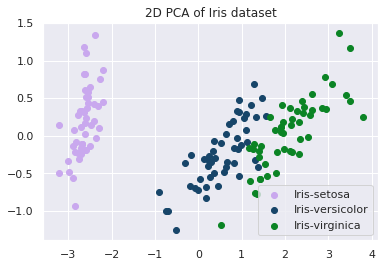

In [49]:
pca_plot(df_iris, '2D PCA of Iris dataset')

Visualizing the Iris results, the PCA kept each label clearly separated from each other and still represeting 97% of the ooriginal dataset variance.

Explained variance ratio: [0.99809123 0.00173592]


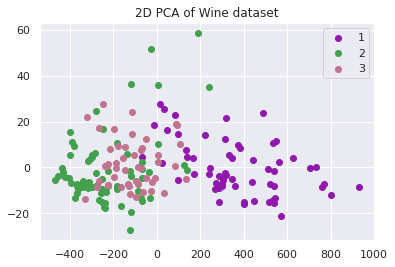

In [50]:
pca_plot(df_wine, '2D PCA of Wine dataset')

Different from the Iris dataset, the wine dataset does not present a clear separation between labels, specially in the middle point of intersection. The last resource is to rely on the training of the ML model to use the advanta of an explained variance of almost 100% to allow a clear separation between labels.

Explained variance ratio: [0.73293525 0.03842952]


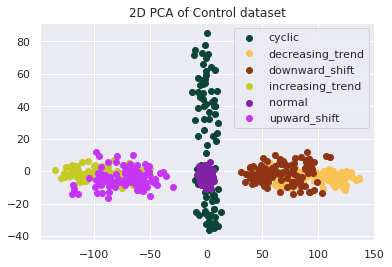

In [55]:
pca_plot(df_ctrl, '2D PCA of Control dataset')

The control dataset, despite multiples labels and low explained variance of 77%, visually it shows distinct patterns of separation for each different label. The labels with "upward" and "increasing" share similarities, so "decreasing" and "downward", thus grouping near each other, but with few differences and "decreasing" and "increasing" mirroring each other, so "downward" and "upward".

# Simulation

Once the utilities are all set, the next step is to run the simulation for all cases and then discuss the results.

The tests will be divided in as many subsections as datasets, i.e. Iris, Wine and Control. For each dataset every machine learning model will be tested using and not using PCA.

## Iris

Not using pca grid search duration: 0.3669337119999909 seconds
Using pca grid search duration: 0.24851453700000548 seconds

Model metrics (not using pca):
Best hyperparameters: {'clf__metric': 'euclidean', 'clf__n_neighbors': 3, 'clf__weights': 'uniform'}
Best score: 1.0

Model metrics (using pca):
Best hyperparameters: {'clf__metric': 'euclidean', 'clf__n_neighbors': 5, 'clf__weights': 'uniform'}
Best score: 0.9333333333333333

PCA metrics:
Components: 2
 Component  Explained variance  Cumulative
       1.0            0.833269    0.833269
       2.0            0.122764    0.956033

Confusion matrix:


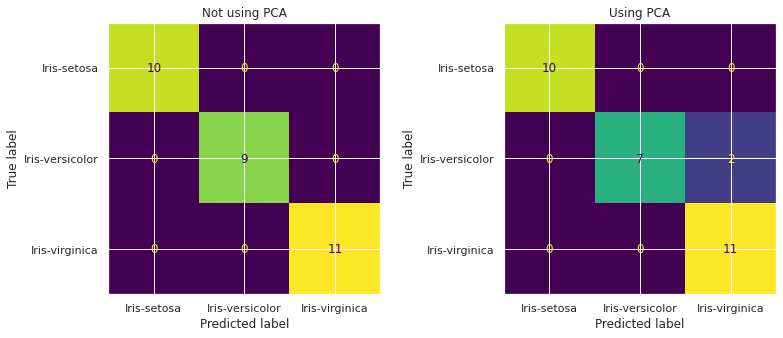

In [ ]:
run(df_iris, train_per=0.8, clf='knn')

Not using pca grid search duration: 0.04364780299999893 seconds
Using pca grid search duration: 0.05020027400000515 seconds

Model metrics (not using pca):
Best hyperparameters: {'clf__var_smoothing': 1e-10}
Best score: 1.0

Model metrics (using pca):
Best hyperparameters: {'clf__var_smoothing': 1e-10}
Best score: 0.9666666666666667

PCA metrics:
Components: 2
 Component  Explained variance  Cumulative
       1.0            0.833269    0.833269
       2.0            0.122764    0.956033

Confusion matrix:


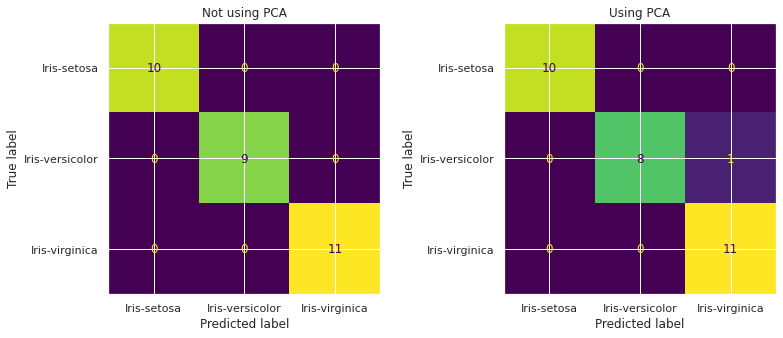

In [ ]:
run(df_iris, train_per=0.8, clf='naive_bayes')

Not using pca grid search duration: 0.1067119819999931 seconds
Using pca grid search duration: 0.11880987499999662 seconds

Model metrics (not using pca):
Best hyperparameters: {'clf__criterion': 'gini', 'clf__max_depth': None}
Best score: 1.0

Model metrics (using pca):
Best hyperparameters: {'clf__criterion': 'gini', 'clf__max_depth': None}
Best score: 1.0

PCA metrics:
Components: 2
 Component  Explained variance  Cumulative
       1.0            0.833269    0.833269
       2.0            0.122764    0.956033

Confusion matrix:


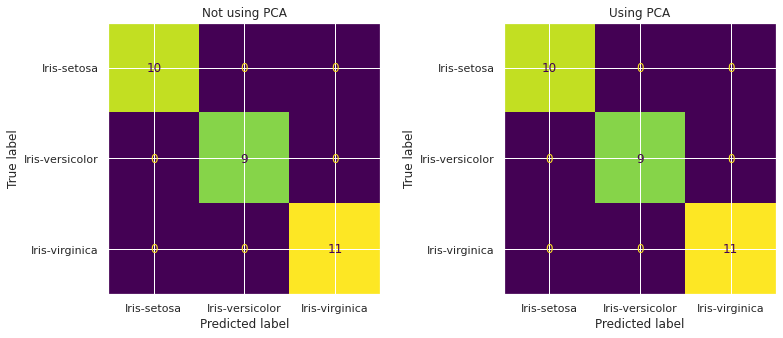

In [ ]:
run(df_iris, train_per=0.8, clf='decision_tree')

Not using pca grid search duration: 1.318963894999996 seconds
Using pca grid search duration: 1.1793537460000039 seconds

Model metrics (not using pca):
Best hyperparameters: {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__n_estimators': 200}
Best score: 1.0

Model metrics (using pca):
Best hyperparameters: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__n_estimators': 50}
Best score: 0.9666666666666667

PCA metrics:
Components: 2
 Component  Explained variance  Cumulative
       1.0            0.833269    0.833269
       2.0            0.122764    0.956033

Confusion matrix:


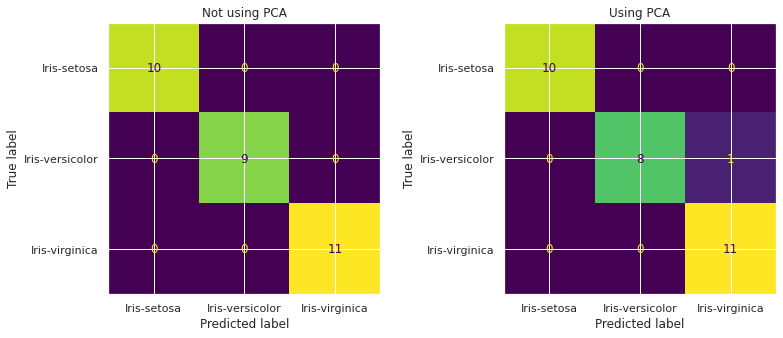

In [ ]:
run(df_iris, train_per=0.8, clf='random_forest')

Discussing the Iris datasets results, the first thing to check and that is commom to all ML models is the PCA metrics, showing a cumulative explained variance of 95% and, as always, the first component concentrating the majority of the variance.

Other thing to check is that the execution time using or not using PCA does not follows a pattern, since the execution time relies on the ideal choice of hyperparameters for each model in the grid search that is adequate for each dataset, is it reduced or not.

The last item is the score, that is reduced once the PCA is used. This is acceptable since the algorithm performs compression and if the reduction for 100% to 93% accuracy in the KNN case or 100% to 96% accuracy in the Naive Bayes case or 100% to 96% accuracy in the random forest case is also acceptable, the beneficies is to reduce the data from 4D to 2D, thus reducing storage.

The decision tree model shows the best results since the accuracy maintained in 100% even after the DR, thus emerging as the best model for this dataset and a DR for a 2D feature map.

## Wine

Not using pca grid search duration: 0.2303598729999976 seconds
Using pca grid search duration: 0.2512421489999923 seconds

Model metrics (not using pca):
Best hyperparameters: {'clf__metric': 'euclidean', 'clf__n_neighbors': 7, 'clf__weights': 'distance'}
Best score: 0.9722222222222222

Model metrics (using pca):
Best hyperparameters: {'clf__metric': 'euclidean', 'clf__n_neighbors': 3, 'clf__weights': 'uniform'}
Best score: 1.0

PCA metrics:
Components: 2
 Component  Explained variance  Cumulative
       1.0            0.400862    0.400862
       2.0            0.187600    0.588463

Confusion matrix:


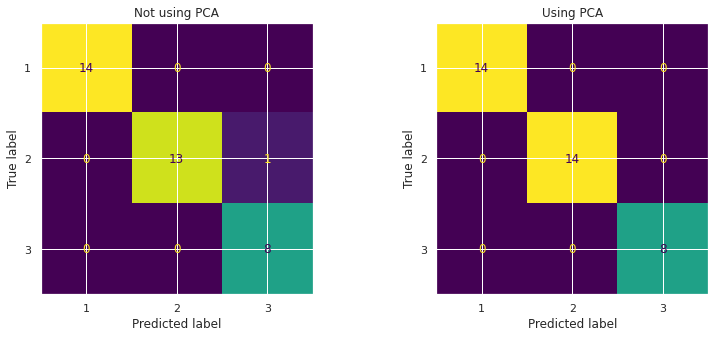

In [ ]:
run(df_wine, train_per=0.8, clf='knn')

Not using pca grid search duration: 0.042347367000004965 seconds
Using pca grid search duration: 0.05174222499999814 seconds

Model metrics (not using pca):
Best hyperparameters: {'clf__var_smoothing': 1e-10}
Best score: 1.0

Model metrics (using pca):
Best hyperparameters: {'clf__var_smoothing': 1e-10}
Best score: 1.0

PCA metrics:
Components: 2
 Component  Explained variance  Cumulative
       1.0            0.400862    0.400862
       2.0            0.187600    0.588463

Confusion matrix:


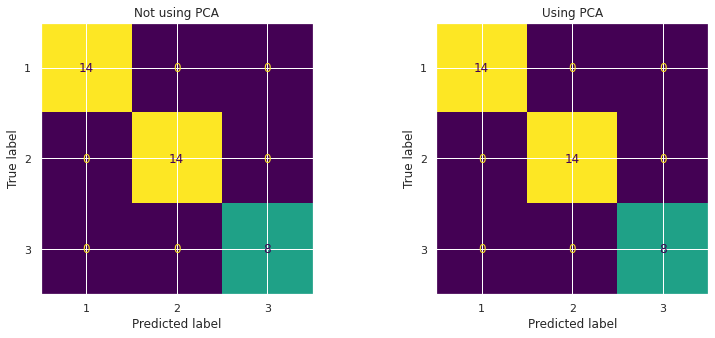

In [ ]:
run(df_wine, train_per=0.8, clf='naive_bayes')

Not using pca grid search duration: 0.10391919699999619 seconds
Using pca grid search duration: 0.11813179299998922 seconds

Model metrics (not using pca):
Best hyperparameters: {'clf__criterion': 'gini', 'clf__max_depth': 5}
Best score: 0.9444444444444444

Model metrics (using pca):
Best hyperparameters: {'clf__criterion': 'gini', 'clf__max_depth': None}
Best score: 1.0

PCA metrics:
Components: 2
 Component  Explained variance  Cumulative
       1.0            0.400862    0.400862
       2.0            0.187600    0.588463

Confusion matrix:


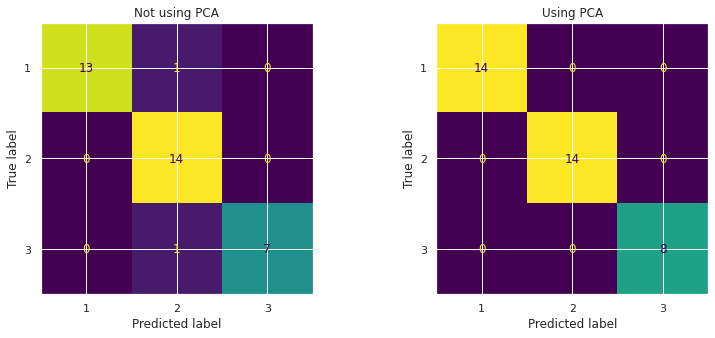

In [ ]:
run(df_wine, train_per=0.8, clf='decision_tree')

Not using pca grid search duration: 1.5441926210000076 seconds
Using pca grid search duration: 1.1471143880000056 seconds

Model metrics (not using pca):
Best hyperparameters: {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__n_estimators': 300}
Best score: 1.0

Model metrics (using pca):
Best hyperparameters: {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__n_estimators': 10}
Best score: 0.9722222222222222

PCA metrics:
Components: 2
 Component  Explained variance  Cumulative
       1.0            0.400862    0.400862
       2.0            0.187600    0.588463

Confusion matrix:


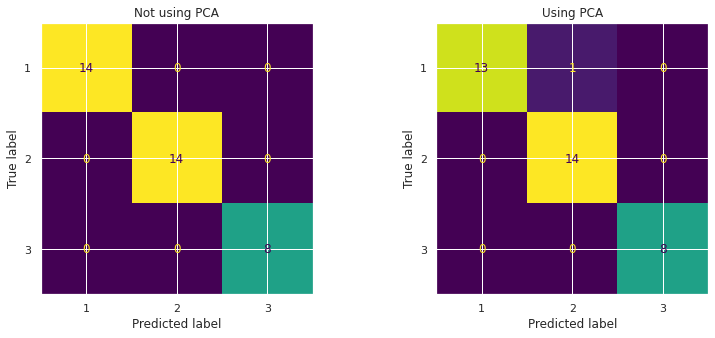

In [ ]:
run(df_wine, train_per=0.8, clf='random_forest')

Discussing the Wine dataset results, the previous regards for the time execution are kept. Also despite its explained variance in the previous section shows 99%, in this analysis it showed circa 58%, but this unknown difference did not affected the score results.

In the KNN case the score rose from 97% to 100% when using PCA, so did the decision tree (94% to 100%). The Naive Bayes case kept the score in 100%. Finally the random forest was the only one model that the score decayed from 100% to 97% when using PCA.

Overall the Wine dataset had best results when using the DR technic PCA and efficiently reduced the dataset from 13D to 2D with no significant loss in accuracy.

In [57]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   target                        178 non-null    object 
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  proli

## Synthetic Control Chart Time Series

Not using pca grid search duration: 0.37001617399999986 seconds
Using pca grid search duration: 0.44373081000000525 seconds

Model metrics (not using pca):
Best hyperparameters: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Best score: 0.9666666666666667

Model metrics (using pca):
Best hyperparameters: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Best score: 0.8

PCA metrics:
Components: 2
 Component  Explained variance  Cumulative
       1.0            0.594480    0.594480
       2.0            0.080646    0.675126

Confusion matrix:


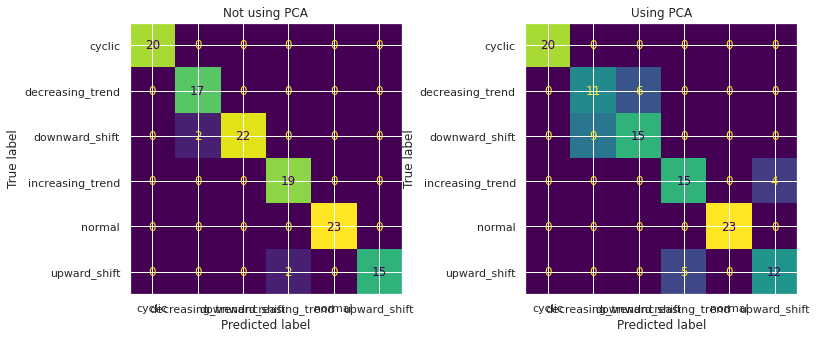

In [ ]:
run(df_ctrl, train_per=0.8, clf='knn')

Not using pca grid search duration: 0.21349889700000801 seconds
Using pca grid search duration: 0.07539926599999092 seconds

Model metrics (not using pca):
Best hyperparameters: {'clf__var_smoothing': 1e-10}
Best score: 0.95

Model metrics (using pca):
Best hyperparameters: {'clf__var_smoothing': 1e-10}
Best score: 0.8

PCA metrics:
Components: 2
 Component  Explained variance  Cumulative
       1.0            0.594480    0.594480
       2.0            0.080646    0.675126

Confusion matrix:


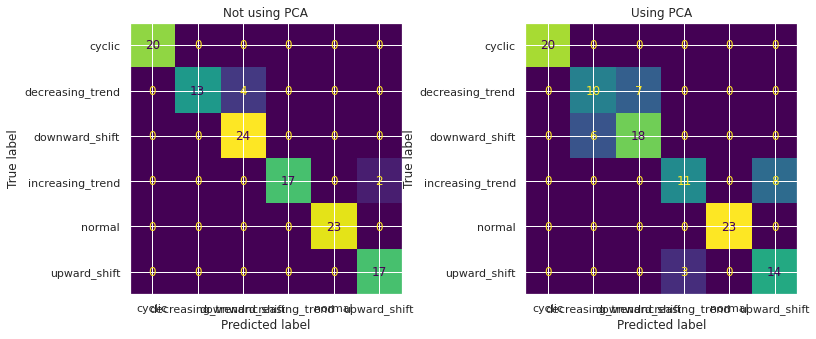

In [ ]:
run(df_ctrl, train_per=0.8, clf='naive_bayes')

Not using pca grid search duration: 0.15127148899999554 seconds
Using pca grid search duration: 0.16947345100000177 seconds

Model metrics (not using pca):
Best hyperparameters: {'clf__criterion': 'gini', 'clf__max_depth': 5}
Best score: 0.8666666666666667

Model metrics (using pca):
Best hyperparameters: {'clf__criterion': 'entropy', 'clf__max_depth': None}
Best score: 0.7833333333333333

PCA metrics:
Components: 2
 Component  Explained variance  Cumulative
       1.0            0.594480    0.594480
       2.0            0.080646    0.675126

Confusion matrix:


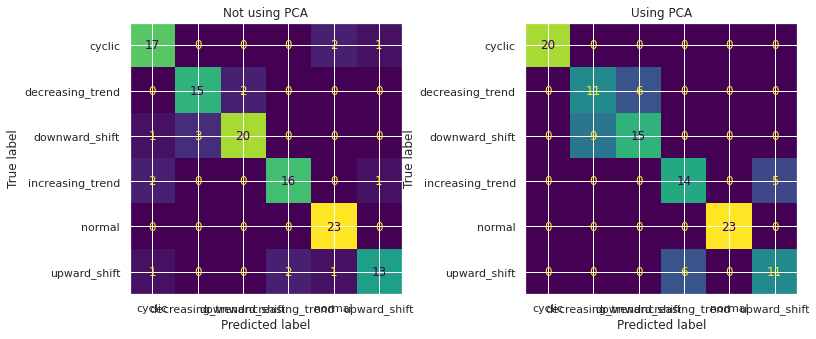

In [ ]:
run(df_ctrl, train_per=0.8, clf='decision_tree')

Not using pca grid search duration: 1.6071962589999913 seconds
Using pca grid search duration: 1.4634698850000092 seconds

Model metrics (not using pca):
Best hyperparameters: {'clf__criterion': 'gini', 'clf__max_depth': 15, 'clf__n_estimators': 100}
Best score: 0.975

Model metrics (using pca):
Best hyperparameters: {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__n_estimators': 50}
Best score: 0.8

PCA metrics:
Components: 2
 Component  Explained variance  Cumulative
       1.0            0.594480    0.594480
       2.0            0.080646    0.675126

Confusion matrix:


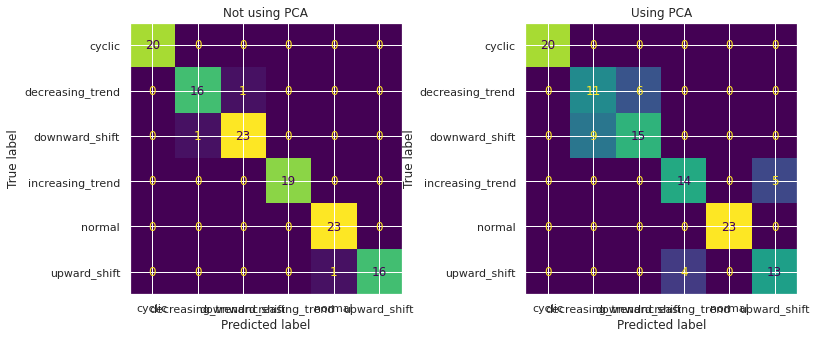

In [ ]:
run(df_ctrl, train_per=0.8, clf='random_forest')

Discussing the Control dataset results, the previous regards for the time execution are kept. Also despite its explained variance in the previous section shows 77%, in this analysis it showed circa 67%, but this unknown difference did not affected the score results.

This dataset had the worst results when using the PCA. All the scores were reduced, e.g for KNN it reduced from 96% to 80%, for Naive Bayes it reduced from 95% to 80%, for decision tree it reduced from 86% to 78% and in the random forest it reduced from 97% to 80%.

In this case the loss in the score can not be compensated by the compression of the feature map to 2D.